<a href="https://colab.research.google.com/github/Urvi-M/BE559/blob/main/Homework2_part3_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2.3 (42 points)

**Learning objectives:**

In this assignment, we will:

* Continue to strengthen our understanding of gradient descent, especially how regularization influences our gradient updates.
* Take a quick crash course through python objects, methods, and attributes, so that we can use scikit-learn.
* Fit ridge regression, lasso, and logistic regression with scikit-learn!

---
Load the libraries we've been using, and set the default font size to 16.

*   `numpy` (as `np`)
*   `matplotlib.pyplot` (as `plt`)

In [146]:
import numpy as np
import matplotlib.pyplot as plt


---
## Part 1 (1 points)

We are going to dig in to one more gradient descent example, this time for case in which we do ridge regression, to hopefully get a better feel for what the regularization term in ridge is doing.

Let's generate some synthetic data, like in our homework, but much simplier. Actually, we are going to follow the exact same example as in the [gradient descent tutorial](https://colab.research.google.com/drive/10WUSP0aq3CaiUXYuYcqXFnV7Tar1q6P0?usp=sharing) that was posted last week.

* use [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy.linspace), to generate a set of `x` 100 values from -5 to 5.

* Define a parameter `bstar=2` that we want to use to generate data, and that we will try to find using least squares.

* Create a set of `y` values such that `y=bstar*x`.

* Add independent Gaussian noise with `std=1` to `y`. Call this noisy version `t`. Use `np.random.seed` and set the `seed=3`. This is so we all have the same random data.

* For plotting purposes, we want to sample time more densely. So create another time index array (call it `xplot`). Use np.arange to create a time index vector from -5 to 5 in steps of 0.01.

* Plot `xplot` vs `bstar*xplot`, and label the axes appropirately.

**Your plot should look like this:**

Text(0, 0.5, 't')

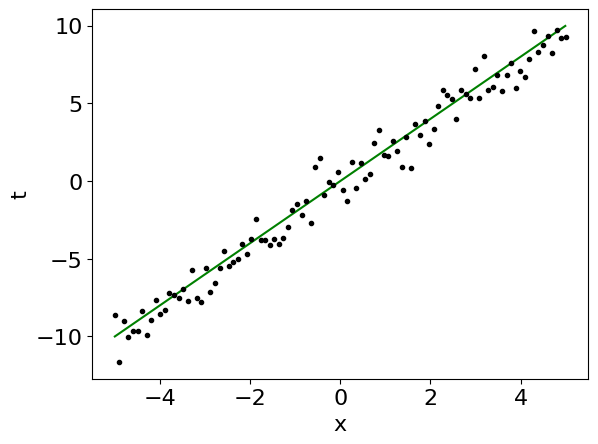

In [147]:
x= np.linspace(-5,5,100)
bstar=2
y=bstar*x
t=np.random.normal(y,1)

np.random.seed(3)
xplot=np.arange(-5,5,0.01)

plt.plot(xplot, bstar*xplot ,'g')
plt.plot(x,t ,'k.' )
plt.xlabel('x')
plt.ylabel('t')

---
## Part 2 (2 points)

Recall that the regularized least squares objective function is: $$J = \frac{1}{2}||t - bX||^2 + \frac{\lambda}{2}||b||^2,$$ where $\lambda$ is a parameter that controls how strong the regularizing term is.

* Write a python function that computes `J` for ridge regression.

* Define a parameter `lam` (i.e. $\lambda$) and set is to 1e-6, i.e. a very weak regularization.

* Scan over a range of `b` (call it `bplot`) from 1.5 to 2.5, and plot the objective function vs. those values.

As expected, `J` should be a quadratic function of `b`. And it looks like the lowest point of J is very very close to 2. Which it should be! bstar = 2 and our regularization term $\lambda$ is very small. Remember that the point of gradient descent is to find bstar when we dont' know it.

**Your plot should look like this:**




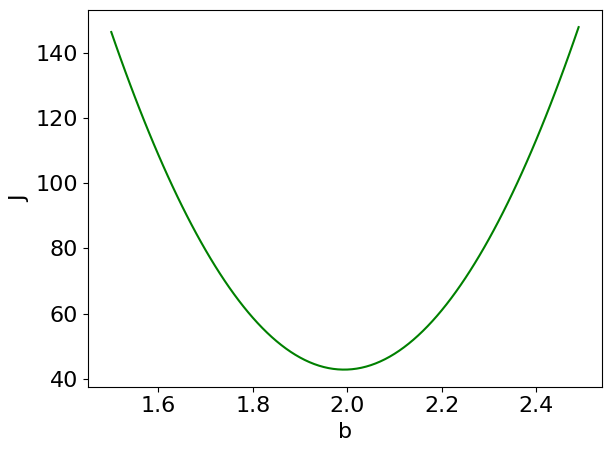

In [148]:
def obj(y, x, b,lam):
  J = 0.5 * np.sum(np.power(y - b*x, 2)) + lam/2*np.sum(np.power(b, 2))
  return J

lam=10**(-6)
J = []
bplot = np.arange(1.5, 2.5, 0.01)
for b in bplot:
    J.append(obj(t, x, b,lam))
plt.plot(bplot, J, 'g-')
plt.ylabel('J')
plt.xlabel('b');
plt.tight_layout()

---
## Part 3 (2 points)

* Write a python function that computes the gradient of `J` for ridge regression. (See lecture 2.2 for the correct equation. Or better yet, try to compute it yourself from `J` defined above!).

**Have your function return the gradient in TWO SEPERATE PARTS: the component that corresponds to the normal least squares component of the objective, and the part that corresponds to the regulariation term. See the gradient descent tutorial for an example that has the gradient only for the unregularized least squares solution.**

* Pick a random initial `b=2.5`, as our starting point for gradient descent, pretending we don't know where `bstar` actually is.

* Perform 200 iterations of gradient descent with learning rate of `alpha=0.0001`. Save the values of `b`, `J`, and both terms of the gradient **multiplied by `alpha`** for each iteration.

In [149]:
def gradient(t,x,b,lam):
  dJ= np.dot(x, x) * b - np.dot(x, t)
  ridge= dJ + lam*b
  return dJ, lam*b

b0= 2.5
J_ridge = [] #save J
gs = [] #unreg reg
R = [] #ridge term
bs = [] #save b
b = b0
iters = 200
alpha = 0.0001

for i in range(iters):
    J_ridge.append(obj(t, x, b, lam))
    g,r = gradient(t, x, b, alpha)
    gs.append(g)
    R.append(r)
    b = b - alpha * (g+r)
    bs.append(b)

---
## Part 4 (2 points)

* Plot `bplot` vs `J` for the values of `J` you computed above (i.e. J as a function of `bplot`) as a function of `bplot`, as a *green line*.
* Plot `b` vs. `J` for the values you obtained during gradient descent as *black dots* on top of your green line. They should look like the are moving towards `bstar`.
* In a second plot, plot `b` as a function of the gradient descent iteration. Is it approaching `bstar`?

**Your plots should look like this:**

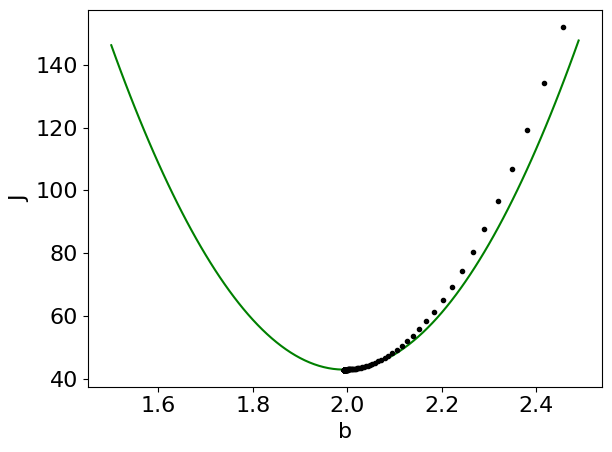

In [150]:
bplot_ = np.arange(1.5, 2.5, 0.005)
plt.plot(bplot, J, 'g-')
plt.plot(bs, J_ridge, 'k.')
plt.ylabel('J')
plt.xlabel('b');
plt.tight_layout()
# yes it is apporaching bstar

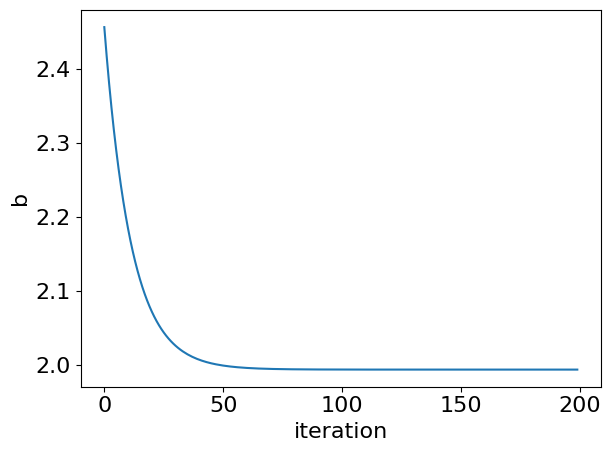

In [151]:
plt.plot(bs)

plt.ylabel('b')
plt.xlabel('iteration');
plt.tight_layout()

---
## Part 5 (2 points)

We want to now examine gradient descent with stronger regularization.

* Set `lam=1e2`.

* Scan over a range of `b` (i.e. `bplot` that you created above) and plot the objective function vs. those values for our objective function we use use `lambda=1e2`.

* Perform 200 iterations of gradient descent with learning rate of `alpha=0.0001`. For each value of `b` compute the value of `J` for ridge regression using `lam=1e2` and ALSO the value of the **UNCONSTRAINED** least squares objective (i.e. the value of our objective function when `lam=0`). Save the values of `b` and both terms of the gradient for each iteration, and also values of `J` for both cases.

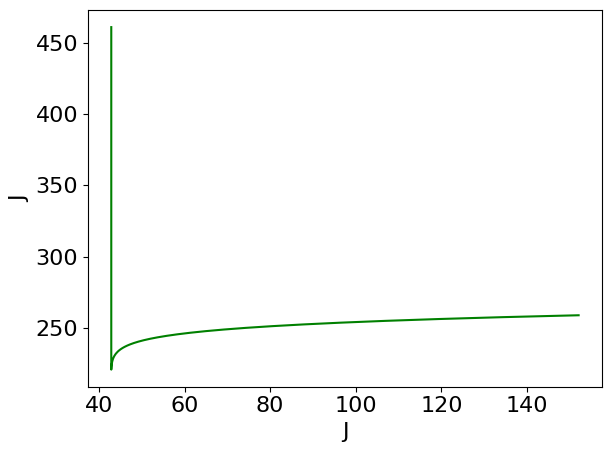

In [152]:
lam_big=10**(2)
J_big = []

for b in bplot_:
    J_big.append(obj(t, x, b,lam_big))
plt.plot(J_ridge, J_big, 'g-')
plt.ylabel('J')
plt.xlabel('J');
plt.tight_layout()


J_new = [] #save J
gs_big = [] #unreg reg
R_big = [] #ridge term
bs_big = [] #save b
b = b0
iters = 200
alpha = 0.0001

for i in range(iters):
    J_new.append(obj(t, x, b,lam_big))
    g,r = gradient(t, x, b, lam_big)
    gs_big.append(g)
    R_big.append(r)
    b = b - alpha * (g+r)
    bs_big.append(b)

J_0 = [] #save J un constrained
for b in bs_big:
    J_0.append(obj(t, x, b,0))

---
## Part 6 (2 points)

* Plot `bplot` vs `J` for the values of `J` you computed above (when using `bplot` and `lam=1e-6`), as a function of `bplot`, as a *green line*.
* Plot `bplot` vs `J` for the values of `J` you computed above (when using `bplot` and `lam=1e2`), as a function of `bplot`, as a *green dotted line*.
* Plot `b` vs. `J` for the values of `J` and `b` you obtained during gradient descent when b was used **IN THE UNCONSTRAINED OBJECTIVE** (i.e. `lam=0`) as *black dots* on top of your **green line**. They should look like the are moving towards `bstar`, but then they go right past it!
* Plot `b` vs. `J` for the values of `J` and `b` you obtained during gradient descent **ON THE CONSTRAINED OBJECTIVE** (i.e. when `lam=1e2`) as *black stars* on top of your **green dotted line**. They should look like the are moving towards `bstar`, but then they go right past it!

<font color='red'>**SHORT ANSWER:** What do you notice about the difference between the this regularized solution and the one you computed above with very weak regularization? Why do the values of `b` pass right by `bstar`?

**Your plot should look like this:**

When we use stronger regularization (higher value of $\lambda$ ), the regularized solution tends to shrink the coefficients towards zero.
But, with very weak regularization (small or zero $\lambda$ ), the coefficients are less constrained, allowing them to take larger values.

Regularization introduces a bias by shrinking the coefficients, which can lead to a reduction in variance (i.e., less sensitivity to noise in the data).
As we increase $\lambda$  , the bias increases, and the model becomes more robust but less flexible.
When lambda  is very weak (close to zero), the model has low bias but higher variance (more sensitive to noise)

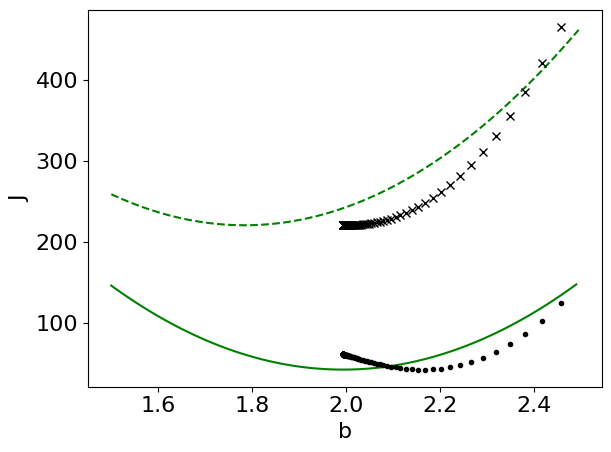

In [153]:
plt.plot(bplot, J, 'g') # correct
plt.plot(bplot_, J_big, 'g--') # correct
plt.plot(bs, J_0, 'k.') # incorrect
plt.plot(bs, J_new, 'kx') # incorrect
plt.ylabel('J')
plt.xlabel('b');
plt.tight_layout()

---
## Part 6 (1 point)

Plot `b` found during gradient descent as a function of the gradient descent iteration when `lam=1e-6` and when `lam=1e2`.

**Your plot should look like this:**

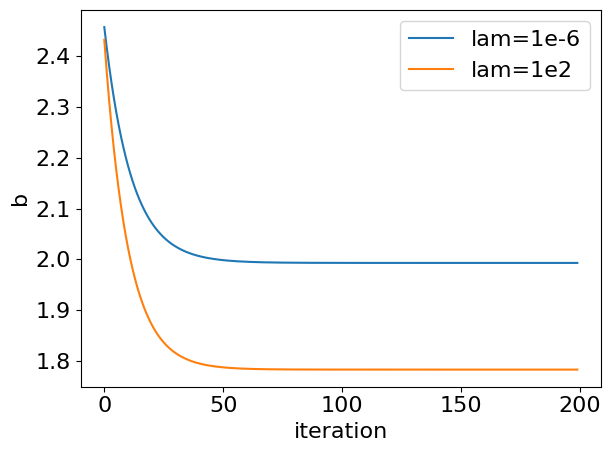

In [154]:
plt.plot(range(iters),bs , label ='lam=1e-6')
plt.plot(range(iters), bs_big, label ='lam=1e2')
plt.ylabel('b')
plt.xlabel('iteration')
plt.legend()
plt.tight_layout()

---
## Part 7 (4 points)

Using two subplots, plot the two separate components of the gradient (the term corresponding to the unconstrained component as stars (`*`) and the term corresponding to the regularization component as a dotted line) and the sum of the two components as a solid line. Plot these values for the gradients when `lam=1e-6` in blue on the left and when `lam=1e2` in red on the right.

<font color='red'>**SHORT ANSWER:** What do you notice about the two seperate terms for `lam=1e2`? How do these terms relate to each other, numerically? What does it mean that they have opposite signs of one another?

**Your plot should look like this:**

The unconstrained component aims to minimize the loss (fit the data well), while the regularization component aims to shrink the coefficients (prevent overfitting).Since λ is large the penalty term can hold significant weightage in determining the fit.
When the regularization term dominates (large λ), the regularization component pulls the coefficients towards zero, leading to smaller absolute values. The opposite signs indicate a trade-off: the model balances fitting the data well with keeping the coefficients small.

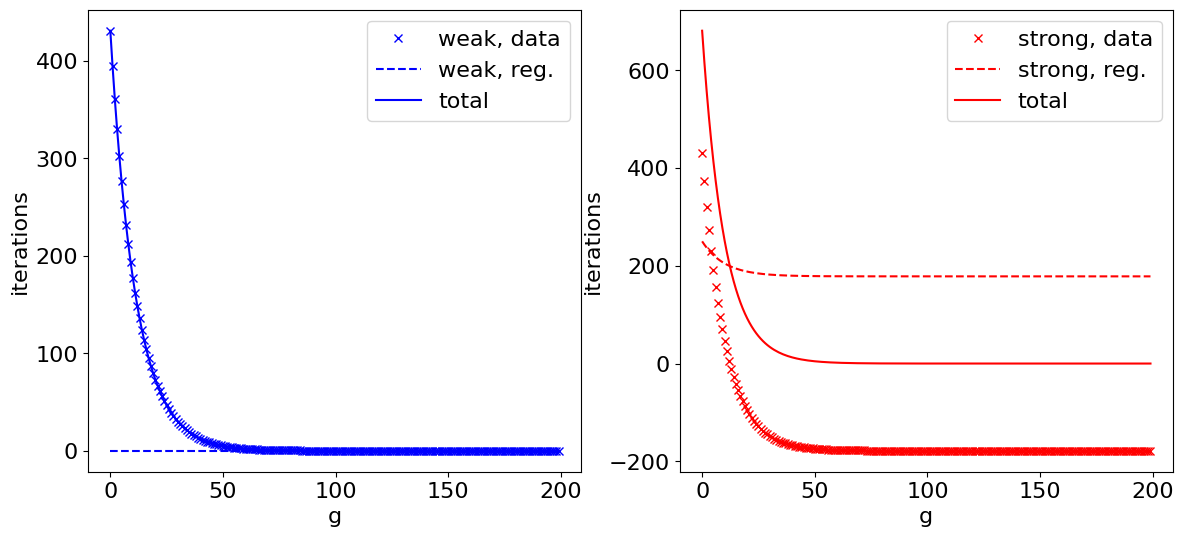

In [155]:
plt.subplots(1, 2, figsize=(14, 6))
plt.subplot(1,2,1)
plt.plot(range(iters),gs ,'bx',label='weak, data')
plt.plot(range(iters),R ,'b--',label='weak, reg.')
total = [(gs[i]+R[i]) for i in range(iters)]
plt.plot(range(iters),total ,'b',label='total')
plt.xlabel('g')
plt.ylabel('iterations')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(iters), gs_big ,'rx',label='strong, data')
plt.plot(range(iters), R_big,'r--',label='strong, reg.')
total_big = [(gs_big[i]+R_big[i]) for i in range(iters)]
plt.plot(range(iters), total_big,'r',label='total')
plt.xlabel('g')
plt.ylabel('iterations')
plt.legend()
plt.show()

---
## Part 8 (0 points)

One way to understand what's going on here is to plot each component of the gradient as a line pointing in the direction it wants to pull `b`, overlayed over our plots that looked at how `b` changed during gradient descent. Like so:

In [156]:
#fig, ax = plt.subplots()

# plt.plot(bplot, J, 'g-')
# plt.plot(bplot, J2, 'g--')
# plt.plot(bs2, Js2, 'k.')
# plt.plot(bs2, Js3, 'k*')

# plt.arrow(x=bs2[-1][0], y=Js3[-1], dx=(10*gs2[0,-1]), dy=0, width=0.001, color="red")
# plt.arrow(x=bs2[-1][0], y=Js3[-1], dx=(10*gs2[1,-1]), dy=0, width=0.001, color="blue")

# plt.arrow(x=bs2[-1][0], y=Js2[-1], dx=(10*gs2[0,-1]), dy=0, width=0.001, color="red")
# plt.arrow(x=bs2[-1][0], y=Js2[-1], dx=(10*gs2[1,-1]), dy=0, width=0.001, color="blue")

# plt.ylabel('J')
# plt.xlabel('b');
# plt.tight_layout();
#

What we can see from this that each term is pulling `b` in opposite directions, and when gradient descent converges, those two terms are equal and opposite. In the **CONSTRAINED** objective function, that corresponds to a minimum. In the **UNCONSTRAINED** funcdtion (which is simply PART of the constrained function) is does not -- because the regularization term is pulling it away!

---
## Part 9 (1 points)

We will now switch gears a bit and use [scikit-learn](https://scikit-learn.org/stable/) to fit [lasso](https://en.wikipedia.org/wiki/Lasso_(statistics)) on the prostate cancer dataset introduced in class. Scikit-learn is a super helpful machine learning python library that can perform lots of standard but algorithmically challenging analyses so you don't have to write them all from scratch! Yippee!!

* First thing we need to do is load our prostate cancer dataset. These data are stored in a .csv (comma separated values) file at the following URL:

https://raw.githubusercontent.com/empathy87/The-Elements-of-Statistical-Learning-Python-Notebooks/master/data/Prostate%20Cancer.txt

To do this, use the `genfromtxt` function in numpy (i.e. `np.genfromtxt`) to load the data directly from this URL into a variable called `data`.  Since this is a .csv file, you will need to set the delimeter to ',' (a comma in single quotes).  The first row in the file contains column labels.  You can use the option `skip_header=1` to skip the first line and only read the numerical data.


In [157]:
data = np.genfromtxt('https://raw.githubusercontent.com/empathy87/The-Elements-of-Statistical-Learning-Python-Notebooks/master/data/Prostate%20Cancer.txt',delimiter=',',skip_header=1)

Some of the columns of this array contain features of the data that we don't need. Use the [np.delete](https://numpy.org/doc/stable/reference/generated/numpy.delete.html) function to create a new array called `X` that does not include the 1st, 2nd to last, and final columns of `data`.

In [158]:
x= np.delete(data,(0,-2,-1),1)

---
## Part 10 (2 points)

In class, we discussed the [correlation matrix](https://en.wikipedia.org/wiki/Correlation#correlation%20matrices), which are simply the correlation values of all pairs of your independent variables.

* Create a list of strings for each of the dependent variables: `lcavol`, `lweight`, `age`, `lbph`, `svi`, `lcp`, `gleason`, `pgg45`.

* Use the `numpy` method [`corrcoef`](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) to compute the correlation matrix. Note that you may have to take the transpose of `X`; your correlation matrix should have dimensions equal to the number of independent variables, not the number of data samples.

* Use the `matplotlib` function [`imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) to plot your correlation matrix. Label each row and column with the appropriate name of each variable.

<font color='red'>**SHORT ANSWER:** Are `lcp` and `lcavol` strongly correlated, like they were in lecture? Print the value of the correlation between these two dependent variables.

**Your plot should look like this:**



Yes . their correlation is strong

correlation between lcp and lcavol 0.6753104840558688


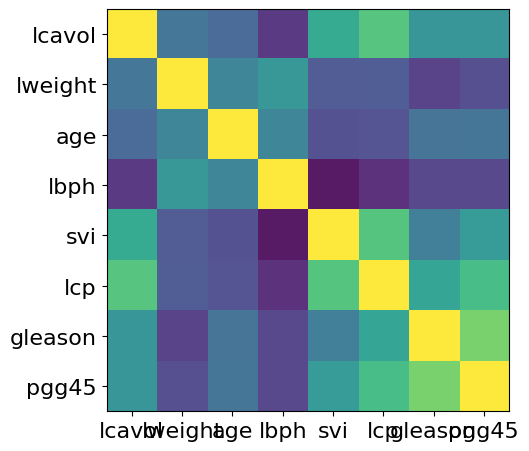

In [159]:
lcavol = x[:,0]
lweight= x[:,1]
age= x[:,2]
lbph= x[:,3]
svi= x[:,4]
lcp= x[:,5]
gleason= x[:,6]
pgg45= x[:,7]
cm =np.corrcoef(np.transpose(x))
plt.imshow(cm,alpha=0.9)
label=['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']
plt.xticks([0,1,2,3,4,5,6,7],label)
plt.yticks([0,1,2,3,4,5,6,7],label)
plt.tight_layout()
print('correlation between lcp and lcavol',cm[0,5])


---
## Part 11 (1 points)

[Pandas](https://pandas.pydata.org/) is another python package that we will make use of in the future. It can be especially useful for looking at structured data arrays, and computing some simple statistics on them. We won't use it extensively here, just a quick peek at it.

* Import the pandas library into python as `pd`.
* Use the [dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) method to create a tabular dataframe called `df` for our data. The `columns` argument should be equal to the list of features we created above. No other arguments are required, beyond the data itself, `X` and `columns`.

* Use the [`dataframe.head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) method to show the first `n=10` rows of your dataframe `df`.

**Your dataframe should look like this:**

In [160]:
import pandas as pd
df=pd.DataFrame(x, columns= label)
df.head(10)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-0.579818,2.769459,50.0,-1.386294,0.0,-1.386294,6.0,0.0
1,-0.994252,3.319626,58.0,-1.386294,0.0,-1.386294,6.0,0.0
2,-0.510826,2.691243,74.0,-1.386294,0.0,-1.386294,7.0,20.0
3,-1.203973,3.282789,58.0,-1.386294,0.0,-1.386294,6.0,0.0
4,0.751416,3.432373,62.0,-1.386294,0.0,-1.386294,6.0,0.0
5,-1.049822,3.228826,50.0,-1.386294,0.0,-1.386294,6.0,0.0
6,0.737164,3.473518,64.0,0.615186,0.0,-1.386294,6.0,0.0
7,0.693147,3.539509,58.0,1.536867,0.0,-1.386294,6.0,0.0
8,-0.776529,3.539509,47.0,-1.386294,0.0,-1.386294,6.0,0.0
9,0.223144,3.244544,63.0,-1.386294,0.0,-1.386294,6.0,0.0


---
## Part 12 (1 points)

* Use the [`dataframe.corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) method to again compute the correlation matrix of your indepedent variables that are organized within `df`.

<font color='red'>**SHORT ANSWER:** Are the correlation matrices the same when you use `numpy` and when you use `pandas`? Good!

**Your dataframe should look like this:**


yes they match

In [161]:

corm=df.corr()
corm

yes they match


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
lcavol,1.000000,0.280521,0.225000,0.027350,0.538845,0.675310,0.432417,0.433652
lweight,0.280521,1.000000,0.347969,0.442264,0.155385,0.164537,0.056882,0.107354
age,0.225000,0.347969,1.000000,0.350186,0.117658,0.127668,0.268892,0.276112
lbph,0.027350,0.442264,0.350186,1.000000,-0.085843,-0.006999,0.077820,0.078460
svi,0.538845,0.155385,0.117658,-0.085843,1.000000,0.673111,0.320412,0.457648
lcp,0.675310,0.164537,0.127668,-0.006999,0.673111,1.000000,0.514830,0.631528
gleason,0.432417,0.056882,0.268892,0.077820,0.320412,0.514830,1.000000,0.751905
pgg45,0.433652,0.107354,0.276112,0.078460,0.457648,0.631528,0.751905,1.000000


---
## Part 13 (1 points)

Just to prove to yourself that you've 'earned' the right to graduate to using scikit-learn, let's check that the solution it provides when we perform ridge regression is the same that we know how to compute ourselves.

* Our dependent variable `lpsa`	(log prostate specific antigen) is the second to last entry of our data matrix `data`. Create a variable `t` that is equal to that column of `data`.

* Import the [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) function from `sklearn.linear_model`.




In [162]:
t = np.array(data)[:,-2]
from sklearn.linear_model import Ridge

---
## Part 14 (2 points)

Python is an object oriented language, so it works a little differently than Matlab. With Scikit-learn, we are going to be seeing a lot more of this.

* Use the `Ridge` function to create what is called an 'instance of an object' class, and call this instance `clf`. For arguments to `Ridge` use `alpha=1.0` (i.e. weak regulariztion) and `fit_intercept=False` (i.e. don't learn a constant term). Note that when we wrote the ridge objective function down we used $\lambda$ as the coefficient that controls the strength of regularization, but scikit-learn calls this parameter `alpha`.

Notice that after we do this, we haven't actually done anything yet, just created a sort of 'container' called an object instance, that we will later do stuff on.


In [163]:
clf=Ridge(alpha=1.0,fit_intercept =False)

---
## Part 15 (2 points)

In an object oriented language, once you've created an instance of something, that thing has 'methods' associated with it. Methods are functions that can do things on that object. The way to 'call' a method associated with an instance of a object is to use a `.` after the instance: i.e. `object.method()`

* Use the `fit` method on your `clf` object instance class using `X` and `t` as data. See the documentation from `Ridge` for additional documentation for each method associated with an instance of ridge, such as [`fit`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge.fit).

Now we actually did something to `clf` -- we fit it using our data!



In [164]:
clf.fit(x,t)

Ridge(fit_intercept=False)

Object instances also have what are knowns as attributes, which are kind of like 'stuff' inside the object that you might want to know something about. The way to see an attribute, confusingly, is also to use a `.`, i.e. `object.attribute`. This can be confusing at first (i.e. how do you know what is an attribute and what is a method!?) but it will get easier with time.

* A ridge instance has an attribute called `coef_` which is the coefficients of the model. Print out `clf.coef_`.

In [165]:
print('array',clf.coef_)

array [ 0.55869858  0.60999902 -0.01933688  0.09273029  0.68885563 -0.08888248
  0.06981158  0.00404428]


---
## Part 16 (2 points)

We know how to find the coefficients of a ridge regression model! Go back to assignment 2.2 and find your function for the analytical solution for ridge regression. Use that function, with `lambda=1.0` (i.e. `alpha` in scikit-learn language) to show that the solution you get with your homebrewed function is the same as what we get with scikit-learn.

**Your results should look like this:**




In [166]:
lam= 1.0
def gradient(X,t,lam):
  A = np.transpose(X) @ X + lam * np.identity(np.shape(X)[1])
  b = np.linalg.inv(A) @np.transpose(X) @ t
  return b
result = [gradient(x,t,lam)]
print(result)


[array([ 0.55869858,  0.60999902, -0.01933688,  0.09273029,  0.68885563,
       -0.08888248,  0.06981158,  0.00404428])]


---
## Part 17 (2 points)

Now that we have our feet a bit wet with python objects, methods, and attributes, we are ready to harness the power of scikit-learn for fitting our lasso model! Good thing we don't have to optimize the parameters of the lasso model ourselves -- what a pain!

* Import the [`Lasso`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) function from `sklearn.linear_model`.

Recall that the Lasso objective function is $$J = \frac{1}{2}||t - bX||^2 + \frac{\lambda}{2}\sum_i |b_i|,$$

* Use the `Lasso` function to create an 'instance of an object' class, and call this instance `clf`. For arguments to `Lasso` use `alpha=0.1`. Again, scikit-learn `alpha` is our $\lambda$ from above.

* Use the `fit` method on your `clf` object instance class using `X` and `t` as data. See the documentation from `Lasso` for additional documentation for each method associated with an instance of Lasso, such as [`fit`](
 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso.fit).

* A Lasso instance has an attribute called `coef_` which is the coefficients of the model. Print out `clf.coef_`.

Was that easy or what!?

**Your results should look like this:**


In [167]:
from sklearn.linear_model import Lasso
clf=Lasso(alpha=0.1)
clf.fit(x,t)
print('array',clf.coef_)

array [ 0.57789584  0.04282022 -0.00555591  0.07637548  0.          0.
 -0.          0.00671169]


---
## Part 18 (2 points)

Let's check out how the coefficients of the Lasso model change as we increase or decrease the severity of the regulariation.

* Use a list comprehension to compute the Lasso coefficients when `alpha` (i.e. $\lambda$) ranges from `0.001` to `0.93`. Use 100 different values of alpha within that range.

* Plot the values of each coefficient as a function of the sum of all cofficients for that setting of `alpha`. Add a legend so you can see which parameter is which. Make your plot big so you can see everything clearly.


<font color='red'>**SHORT ANSWER:** `lcp` was the feature that we noticed was correlated with `lcavol`. What happens to the coefficient for `lcp` was the regularization is increased?

**Your plot should look like this:**


It tends to become negavtive once it sapproaches b.

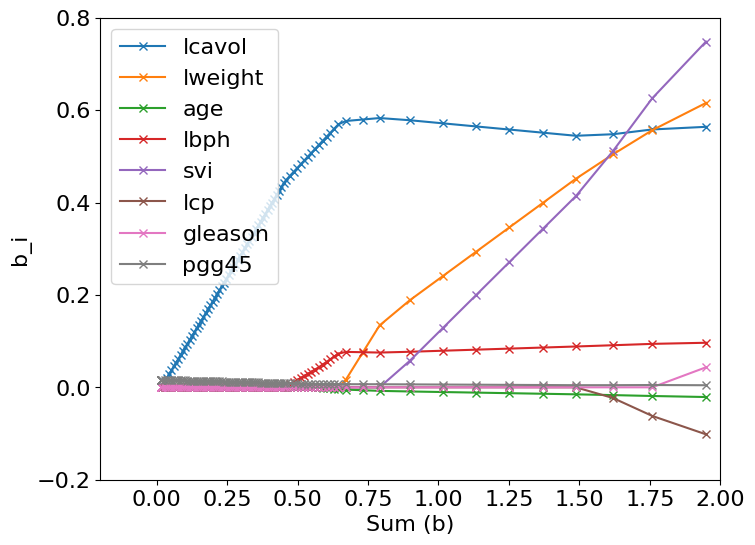

In [168]:
alphas = np.linspace(0.001, 0.93, 100)
coefs = []
n=8
for alpha in alphas:
    clf = Lasso(alpha=alpha)
    clf.fit(x, t)
    coefs.append(clf.coef_)

plt.figure(figsize=(8, 6))
for i in range(n):
    plt.plot(np.sum(coefs, axis=1), [(coef[i]) for coef in coefs],'x-', label=label[i])

plt.xlim([-0.2,2])
plt.ylim([-0.2,0.8])
plt.xlabel('Sum (b)')
plt.ylabel('b_i')

plt.legend(loc='upper left')
plt.show()

---
## Part 19 (2 points)

Now that we are experts in using objects in python, and using scikit-learn, lets give logistic regression a try with it!

First we have to create some fake data that we are going to fit our model to. (As we have been doing, for didactic purposes). In lecture 2.5, I described a behavioral experiment where rats listen to a series of auditory pulses, and they have to 'count' how many pulses are to their left and right, and then make a choice depending on if there were more left or right pulses. Let's model this simple decision making task.

* Create 1000 'trials' of behavioral data, by creating two arrays, `L` and `R` that each contain the number of leftward or rightward pulses on a trial. To do this, use the numpy function [`random.randint`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html). Use `-4` as your lower limit and `4` as your upper limit.

* Stack these two arrays on top of each other to create a 2 by 1000 array called `x`. Use the numpy function [stack](https://numpy.org/doc/stable/reference/generated/numpy.stack.html).

In [169]:
n=1000
L= np.random.randint(-4,4,n)
R= np.random.randint(-4,4,n)
x=np.stack([L,R])
np.shape(x)

(2, 1000)

---
## Part 20 (2 points)

Recall that in our logistic regression model, these independent variables relate to the probability of a discrete event (i.e. a 0 or 1, which in our model here corresponds to which way the animal chose) by a [logistic function](https://en.wikipedia.org/wiki/Logistic_function): $$Pr(t_i = 1) = y_i = f(x_i)$$.

* We need some coefficients $b$ to combine the left and right clicks with, to generate $y_i$. Choose this to be `bstar` and set `bstar = [-1,1]`. This corresponds to left pulses _decreasing_ the probability of a rightward choice (becuase the first term is -1) and right pulses _increasing_ the probability of a rightward choice (because the second term is +1).

* Compute the dot product of `bstar` and `x` and call it `X`, i.e $X_i = b^*x_i$. This is the total input into our logistic function, and can be helpful for understanding the relationship between the inputs to the logistic function and its output.

* Plot the output of the logistic function with `X` as its input, i.e. $$y_i = \frac{1}{1+exp(-X_i)}$$. Use dots or stars in your plot instead of lines (otherwise it will look like a total jumble).

**Your plot should look like this:**

(1000,)
(1000,)


Text(0, 0.5, 'Xi')

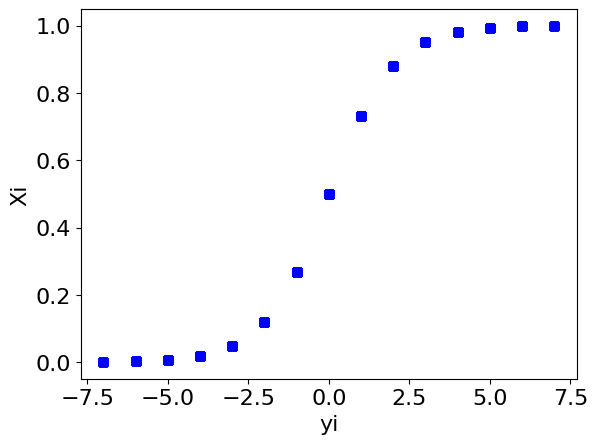

In [170]:
bstar =[-1,1]
X=bstar@x
def logistic_function(X):
    return 1 / (1 + np.exp(-X))
print(np.shape(X))

y = logistic_function(X)
print(np.shape(y))

plt.plot(X,y,'bs')
plt.xlabel('yi')
plt.ylabel('Xi')

---
## Part 21 (2 points)

To generate our data, which is corrputed by noise, we need to draw random samples from a Bernoulli distribution, using `y` as the probability that each datapoint is a 0 or a 1. In other words, recall that each datapoint $t_i$ is distributed Bernoulli: $$ t_i \sim B(y_i)$$ where $$y_i = f(x_i)$$ and $f()$ is the logistic function.

* Using `scipy.stats` to do this. The [`Bernoulli`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html) distribution is what you want to use.

* Revisit some of Module 1's assignments (such as 1.3) if you've forgotten how to use `scipy.stats` and `rvs`.

In [171]:
import scipy.stats as sc
t=sc.bernoulli.rvs(y)

---
## Part 22 (2 points)

To get a sense of how the noisy data (i.e. t_i) relates to the probability of the data (i.e. y_i) plot `X` vs `y` as above and overlay it with two histograms, one for the `X` values when `t=0` and one for the `X` values when `t=1`. For [hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) use the arguments `density=True` and `alpha=0.5`.

<font color='red'>**SHORT ANSWER:** What do you notice about the distributions whe `t=1` and `t=0`?

**Your plot should look like this:**

They are left and right distributions which both look gaussian. They overlap over 0 which is when the probability to choose either side is 0.5. They are representative of the trend of the curve. Where the Y-axis is the probability for choosing right.

Text(0, 0.5, 'Xi')

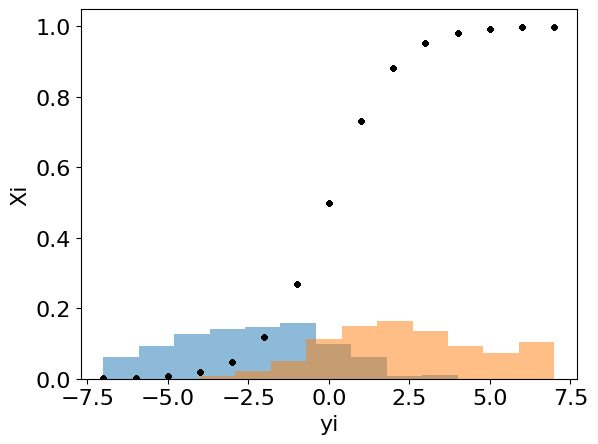

In [172]:
plt.plot(X,y,'k.')
plt.hist(X[t==0], density=True, alpha=0.5)
plt.hist(X[t==1], density=True, alpha=0.5)
plt.xlabel('yi')
plt.ylabel('Xi')

---
## Part 23 (2 points)

OK let's recover `bstar` from our data using scikit-learn's [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression).

* Import scikit-learn's [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) class as `LogisticRegression`.

* Use the `LogisticRegression` function to create an 'instance of an object' class, and call this instance `clf`. For arguments to `LogisticRegression` use `penalty='none'` and ` fit_intercept=False`.

* Use the `fit` method on your `clf` object instance class using `x` and `t` as data. See the documentation from `LogisticRegression` for additional documentation for each method associated with an instance of `LogisticRegression`, such as [`fit`](
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit). Note tht you may to take the tranpose of `x` if the dimensions don't work out correctly.

* A LogisticRegression instance has an attribute called `coef_` which is the coefficients of the model. Print out `clf.coef_`.

<font color='red'>**SHORT ANSWER:** Did `LogisticRegression` recover `bstar`?

**Your results should look like this:**

In [173]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(penalty='none', fit_intercept=False)
clf.fit(np.transpose(x),t)
print('array',clf.coef_)

##it came very close to recovering bstar at approximately -1,1

array [[-1.09395567  1.041334  ]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
